Tabu Search

Tabu search (TS) is an iterative neighborhood search algorithm, where the neighborhood changes dynamically.

TS enhances local search by actively avoiding points in the search space already visited.

By avoiding already visited points, loops in search trajectories are avoided and local optima can be escaped. TS can be considered as the combination of local search (LS) and memory structures.

The main feature of TS is the use of an explicit memory.

Uses of memory have two goals:  
to prevent the search from revisiting previously visited solutions and to explore the unvisited areas of the solution space.



In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import math
from tqdm import tqdm

In [5]:
def cost_of_tour(G, tour):
    cost = 0
    for u, v in zip(tour, tour[1:]):
        cost += G[u][v]["weight"]
    cost += G[len(tour) - 1][0]["weight"]
    return cost

In [6]:
def get_best_neighbour(G, tour, tabu_history, tabu_limit, aspiration):
    best_neighbour = None
    best_neighbour_cost = math.inf
    for i in range(len(G.nodes)):
        for j in range(len(G.nodes)):
            if i == j:
                continue
            tmp_route = tour.copy()
            tmp = tmp_route[i]
            tmp_route[i] = tmp_route[j]
            tmp_route[j] = tmp
            tmp_cost = cost_of_tour(G, tmp_route)
            if tuple(tmp_route) in tabu_history:
                if tabu_history[tuple(tmp_route)] > 0:
                    if tabu_history[tuple(tmp_route)] > aspiration:
                        continue
            if tmp_cost < best_neighbour_cost:
                best_neighbour_cost = tmp_cost
                best_neighbour = tmp_route
                tabu_history[tuple(best_neighbour)] = tabu_limit
    return best_neighbour


In [7]:
def tabu_search(
    G,
    initial_solution,
    num_iter,
    tabu_history,
    tabu_limit,
    aspiration,
    cost_function,
    neighbour_function,
    use_historical_best=False,
    use_tqdm=False
):
    best_solution = initial_solution
    historical_best = best_solution
    historical_best_cost = cost_function(G, historical_best)
    best_cost = cost_function(G, best_solution)
    states = [best_cost]
    if use_tqdm:
        pbar = tqdm(total=num_iter)
    for _ in range(num_iter):
        if use_tqdm:
            pbar.update()
        for x in tabu_history:
            tabu_history[x] -= 1
        tabu_history = {x: tabu_history[x] for x in tabu_history if tabu_history[x] > 0}
        best_solution = neighbour_function(
            G, best_solution, tabu_history, tabu_limit, aspiration
        )
        best_cost = cost_function(G, best_solution)
        if best_cost <= historical_best_cost:
            historical_best = best_solution
            historical_best_cost = best_cost
        states.append(best_cost)
    return best_solution, best_cost, states


Initial solution: [0, 4, 2, 1, 6, 5, 3, 7, 9, 8]
Initial cost: 598


100%|██████████| 100/100 [00:00<00:00, 2691.50it/s]

Best Solution: [0, 7, 2, 5, 9, 6, 8, 4, 3, 1]
Best Cost: 249


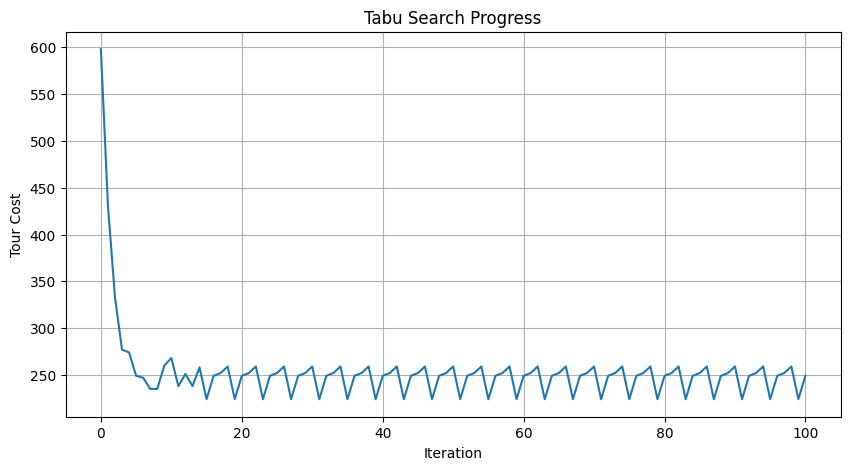

In [10]:
G = nx.complete_graph(10)
for (u, v) in G.edges():
    G[u][v]["weight"] = random.randint(1, 100)

aspiration = 2
tabu_history = {}
num_iterations = 100
tabu_limit = 5

initial_solution = list(G.nodes())
random.shuffle(initial_solution)
initial_cost = cost_of_tour(G, initial_solution)
print(f"Initial solution: {initial_solution}")
print(f"Initial cost: {initial_cost}")

best_solution, best_cost, states = tabu_search(
    G,
    initial_solution,
    num_iterations,
    tabu_history,
    tabu_limit,
    aspiration,
    cost_of_tour,
    get_best_neighbour,
    use_tqdm=True
)

print(f"Best Solution: {best_solution}")
print(f"Best Cost: {best_cost}")

plt.figure(figsize=(10, 5))
plt.plot(states)
plt.xlabel("Iteration")
plt.ylabel("Tour Cost")
plt.title("Tabu Search Progress")
plt.grid(True)
plt.show()
